In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(omega2, omega3):
    part1 = 1 + 2*omega3*np.cos(0.01)*np.sin(0.01)
    part2 = omega2 + (1-omega2)*np.sin(0.01)**2/(1-np.cos(0.01))**2
    return np.maximum(part1, part2)

x = np.linspace(1-np.sin(0.01)*(1-np.cos(0.01)), 1, 10)
y = (1-x)/(np.sin(0.01)*(1-np.cos(0.01)))

X, Y = np.meshgrid(x, y)
print(X, Y)

Z = f(X, Y)

[[0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983 0.99999989 0.99999994 1.        ]
 [0.9999995  0.99999956 0.99999961 0.99999967 0.99999972 0.99999978
  0.99999983

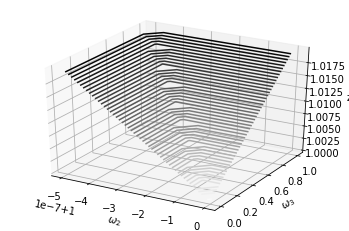

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel(r'$\omega_2$')
ax.set_ylabel(r'$\omega_3$')
ax.set_zlabel('z');